### **Importing section_dict from drive**

In [2]:
from google.colab import drive
import json

drive.mount('/content/drive',force_remount=True)
section_dict = dict()

with open('/content/drive/MyDrive/section_dict.json', 'r', encoding = 'utf-8') as file:
  section_dict = json.load(file)

Mounted at /content/drive


In [3]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


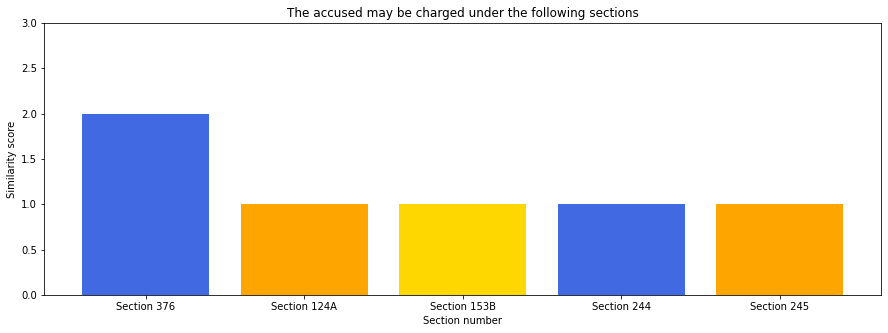



Section 376 : 

 
Whoever, except in the cases provided for in sub-section (2), commits rape, shall be punished with rigorous imprisonment of either description for a term which shall not be less than ten years, but which may extend to imprisonment for life, and shall also be liable to fine.
Whoever—
		
being a police officer, commits rape,
			
within the limits of the police station to which such police officer is appointed; or
in the premises of any station house; or
on a woman in such police officer’s custody or in the custody of a police officer subordinate to such police officer; or

being a public servant, commits rape on a woman in such public servant’s custody or in the custody of a public servant subordinate to such public servant; or
being a member of the armed forces deployed in an area by the Central or a State Government commits rape in such area; or
being on the management or on the staff of a jail, remand home or other place of custody established by or under any law f

In [15]:
import matplotlib.pyplot as plt

query = 'X tried to murder Y.'

similarity = dict()

stop_words = ["a", "an", "the", "this", "that", "is", "it", "to", "and"]

for k,v in section_dict.items():
  for query_word in query.split():
    if query_word not in stop_words:
      if similarity.get(k):
        similarity[k] += v.count(query_word)
      else:
        similarity[k] = v.count(query_word)


similarity = dict(sorted(similarity.items(), key=lambda kv: kv[1],reverse=True)[:5])

xval = list(similarity.keys())
yval = list(similarity.values())
# f = lambda x:round(x*100,2)
# yval = list(map(f,yval))

plt.figure(figsize = (15,5))
plt.bar(xval,yval,color = ['royalblue','orange','gold'])
plt.xlabel("Section number")
plt.ylabel("Similarity score")
plt.title("The accused may be charged under the following sections")
plt.ylim(min(yval)-1,max(yval)+1)
plt.show()

print("\n")
for k in similarity.keys():
  print(k + ' : \n\n' + section_dict[k] + '\n\n')